In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [66]:
df = pd.read_csv('data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Select features

In [67]:
X = df.drop(columns=['species'])

## Encode targets

In [68]:
le = LabelEncoder()
y = le.fit_transform(df["species"])

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,stratify=y)

## Split data to training and testing

## Scale Features

In [70]:
scaler = StandardScaler()

In [71]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Logmodel

In [72]:
log_model = LogisticRegression(max_iter=200, random_state=42)
log_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200, random_state=42)

## KNN Model

In [73]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)


Logistic Regression Accuracy: 0.921
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0      1.000     1.000     1.000        12
           1      0.857     0.923     0.889        13
           2      0.917     0.846     0.880        13

    accuracy                          0.921        38
   macro avg      0.925     0.923     0.923        38
weighted avg      0.923     0.921     0.921        38



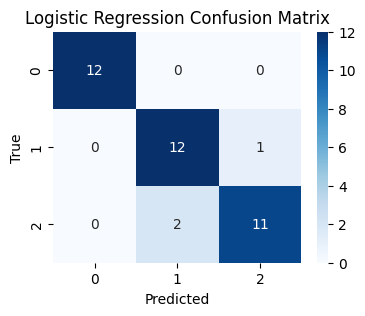


KNN (k=3) Accuracy: 0.947
KNN (k=3) Classification Report:
               precision    recall  f1-score   support

           0      1.000     1.000     1.000        12
           1      0.867     1.000     0.929        13
           2      1.000     0.846     0.917        13

    accuracy                          0.947        38
   macro avg      0.956     0.949     0.948        38
weighted avg      0.954     0.947     0.947        38



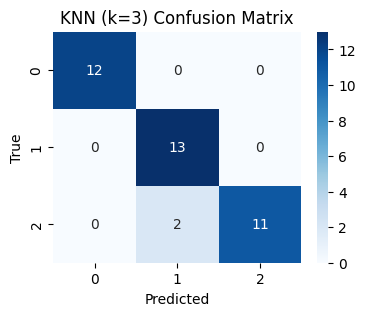

In [74]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -----------------------
# 7. EVALUATE MODELS
# -----------------------
def evaluate(model, Xs, ys, name="Model"):
    preds = model.predict(Xs)
    acc = accuracy_score(ys, preds)
    print(f"\n{name} Accuracy: {acc:.3f}")
    print(f"{name} Classification Report:\n", classification_report(ys, preds, digits=3))
    cm = confusion_matrix(ys, preds)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    return acc

log_acc = evaluate(log_model, X_test_scaled, y_test, name="Logistic Regression")
knn_acc = evaluate(knn_model, X_test_scaled, y_test, name="KNN (k=3)")

# -----------------------
# 8. SAVE THE BEST MODEL (optional)
# -----------------------
best_model = log_model if log_acc >= knn_acc else knn_model

In [75]:
best_model

KNeighborsClassifier(n_neighbors=3)